In [1]:
# 한글

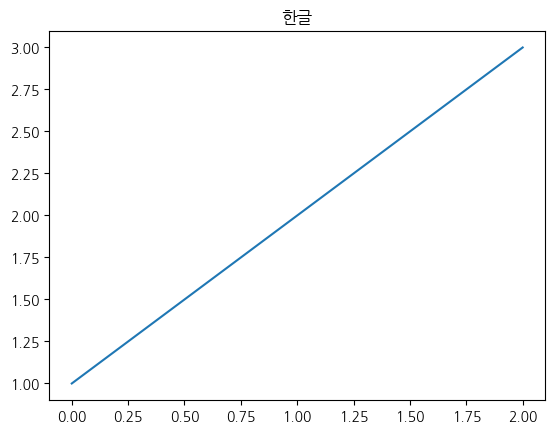

In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [3]:
# 데이터 불러오기

In [20]:
df1 = pd.read_csv('data/울산항 시설관련 정보_20210521.csv', encoding = 'euc-kr')
df2 = pd.read_csv('data/울산_전처리_202122 (1).csv')

In [28]:
df1.head(3)

,분류,구분,부두형태,부두구분,길이(M),최저수심(M),최고수심(M),선석구분,접안능력_톤수(DWT),접안능력_척수,하역능력(천톤),주요취급화물,운영사,비고
0,본항,국유,잔교식(돌핀),석탄부두,270.0,12.0,12.0,1선석,40000.0,1.0,1560.0,석탄,CJ대한통운㈜,NaN
1,본항,국유,잔교식,1부두,149.0,8.0,8.0,1선석,5000.0,1.0,380.0,잡화,울산항만운영㈜,NaN
2,본항,국유,중력식,2부두,602.0,9.0,12.0,1선석,20000.0,1.0,2060.0,"잡화, 시멘트",울산항만운영㈜,NaN


In [34]:
DF1 = df1.iloc[:, 0:10]

DF1.head(3)

,분류,구분,부두형태,부두구분,길이(M),최저수심(M),최고수심(M),선석구분,접안능력_톤수(DWT),접안능력_척수
0,본항,국유,잔교식(돌핀),석탄부두,270.0,12.0,12.0,1선석,40000.0,1.0
1,본항,국유,잔교식,1부두,149.0,8.0,8.0,1선석,5000.0,1.0
2,본항,국유,중력식,2부두,602.0,9.0,12.0,1선석,20000.0,1.0


In [22]:
df2.head(3)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,출항_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
0,울산,3EFF5,EVER CHARM,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-06-16 20:05,2020-06-19 18:15,신조선,WAB,2,(구)벙커링전용정박지 E2,신조선,2289.0,1.0,17.933,MQM,1.0,현대미포의장안벽 01,2020-06-16 13:40:00,2020-06-16 13:50:00,기타,2020-06-17,허가완료,0 days 00:00:00,NaN,2020-06-16 20:05:00,NaN,1950-01-01 00:00:00,25734 days 20:05:00,0,25734,0,0,0,25734,20,37058165,0.0
1,울산,3EFF5,EVER CHARM,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-06-16 20:05,2020-06-19 18:15,신조선,WAB,2,(구)벙커링전용정박지 E2,신조선,2290.0,2.0,17.933,WAB,2.0,(구)벙커링전용정박지 E2,2020-06-16 14:52:00,2020-06-16 20:05:00,급유,2020-06-17,허가완료,0 days 00:00:00,NaN,2020-06-16 20:05:00,NaN,1950-01-01 00:00:00,25734 days 20:05:00,0,25734,0,0,0,25734,20,37058165,0.0
2,울산,3ETC7,EVER CHEER,2020.0,1.0,최종,출항,"17,933",1950-01-01 00:00,2020-07-07 19:42,2020-07-10 13:21,신조선,WAB,2,(구)벙커링전용정박지 E2,신조선,1239.0,1.0,17.933,MQM,4.0,현대미포의장안벽 04,2020-07-07 13:40:00,2020-07-07 13:50:00,기타,2020-07-09,허가완료,0 days 00:00:00,NaN,2020-07-07 19:42:00,NaN,1950-01-01 00:00:00,25755 days 19:42:00,0,25755,0,0,0,25755,19,37088382,0.0


In [35]:
DF1['부두구분'].value_counts()

부두구분
일반부두                7
SK5부두               5
SK2부두               5
신항컨부두               4
6부두                 4
S-Oil2부두            3
SK4부두               3
염포부두                3
자동차부두               3
가스부두                3
S-Oil4부두            3
2부두                 3
3부두                 2
4부두                 2
S-Oil1부두            2
S-Oil3부두            2
정일1부두               2
정일2부두               2
신항일반부두              2
대한유화부두              2
달포부두                2
신항남방파제T/S부두         2
OTK1부두              2
이진 소형선부두            2
SK1부두               2
OTK2부두              2
남화부두                2
UTK부두               2
8부두                 2
신항북방파제T/S부두         2
용연부두                2
세방신항부두              1
대한통운신항부두            1
한진신항부두              1
한전 소형선부두            1
정일스톨트헤븐 울산신항 4부두    1
현대오일터미널 신항부두        1
정일스톨트헤븐 울산신항 3부두    1
온산항 소형선부두           1
정일스톨트헤븐 울산신항 5부두    1
LS니꼬신항부두            1
UTK 신항부두            1
일반소형선부두             1
매암부두                1
장생포 내해부두            1
미포조선 

In [26]:
df2['지정시설명'].value_counts()

지정시설명
장생포호안             16850
정박지-E1            10763
SK2부두 01           7509
정박지-M1             6097
정박지-E2             4578
현대오일터미널신항부두        4403
S-OIL2부두           3624
SK2부두 02           3018
현중해양의장안벽           3007
정박지-E3             3001
S-OIL1부두           2847
정일1부두              2361
가스부두               1926
SK5부두              1878
달포부두 01            1644
정박지-M5             1636
정일2부두              1592
UTK부두              1569
정박지-M4             1545
OTK부두              1433
효성부두               1388
정일스톨트헤븐울산신항3부두     1343
온산1부두              1328
정박지-M6             1287
S-OIL3부두           1206
온산2부두              1204
정일컨부두              1199
정박지-M7             1195
UTT부두              1146
6부두 02             1116
신항일반부두 01          1112
3부두 02             1100
자동차부두 01           1057
SK1부두 11           1053
신항컨테이너부두 04        1046
정박지-M3             1044
신항컨테이너부두 01         987
유화1부두               980
정일스톨트헤븐울산신항5부두      974
신항컨테이너부두 02         970
정박지-M2              962
4부두 01    

In [42]:
merged_df = pd.merge(df2, DF1, left_on='계선장소명', right_on='부두구분', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169805 entries, 0 to 169804
Data columns (total 52 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    169805 non-null  object 
 1   호출부호                  169805 non-null  object 
 2   선박명                   169805 non-null  object 
 3   입항횟수_연도               169805 non-null  float64
 4   입항횟수_횟수               169805 non-null  float64
 5   구분_x                  169805 non-null  object 
 6   입출                    169805 non-null  object 
 7   총톤수                   169805 non-null  object 
 8   입항일시                  169805 non-null  object 
 9   출항일시                  169805 non-null  object 
 10  수리일시                  169765 non-null  object 
 11  항해구분                  169805 non-null  object 
 12  계선장소_코드               169805 non-null  object 
 13  계선장소_숫자               169805 non-null  int64  
 14  계선장소명                 169805 non-null  object 
 15  

In [43]:
merged_df.to_csv('asfff.csv', encoding='utf-8-sig', index=False)